# Inversion for simulated rock sample

#### Import libraries

In [1]:
%matplotlib inline
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, Prism, PolygonalPrism, PrismMesh
from fatiando.gravmag import sphere, prism, polyprism
from fatiando.gridder import regular

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
notebook_name = 'rock_sample_analysis.ipynb'

#### Plot style

In [3]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [4]:
dir_modules = '../../'
sys.path.append(dir_modules)

In [5]:
import my_package as fc

## Loading data 

In [6]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

## Loading Regular grid

In [7]:
with open('data/regular_grid.pickle') as f:
        grid = pickle.load(f)

## Loading results for inversion

In [8]:
with open('data/inversion.pickle') as f:
        inversion = pickle.load(f)

#### List of saved files

In [9]:
saved_files = []

### Parameters of acquisition

In [10]:
xp,yp,zp = grid['x'],grid['y'],grid['z']

In [11]:
Nx,Ny = grid['Nx'],grid['Ny']

### Inversion results

In [12]:
mu = inversion['mu'] 
par = inversion['parameter'] 
p_norm = inversion['p_norm'] 
r_norm = inversion['r_norm'] 
zc = inversion['zc'] 
inc = inversion['inc_l'] 
dec = inversion['dec_l'] 

### Equivalent sources coordinates

In [13]:
xs,ys,zs = regular(grid['area'],grid['shape'],zc)

### The true data

In [14]:
Bz_true = data['bz_true']
Bx_true = data['bx_true']
By_true = data['by_true']
Ba_true = data['B_true']

### Calculating predicted data

In [15]:
p = par[3]

In [16]:
bz = fc.bz_layer(xp,yp,zp,xs,ys,zs,p,inc,dec)
bx = fc.bx_layer(xp,yp,zp,xs,ys,zs,p,inc,dec)
by = fc.by_layer(xp,yp,zp,xs,ys,zs,p,inc,dec) 

In [17]:
b_tot = np.sqrt(bx*bx + by*by + bz*bz)

## Calculating residuals

In [18]:
res_z = Bz_true - bz
res_x = Bx_true - bx
res_y = By_true - by
res_B = Ba_true - b_tot

### Result Analysis

### Data fitting

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


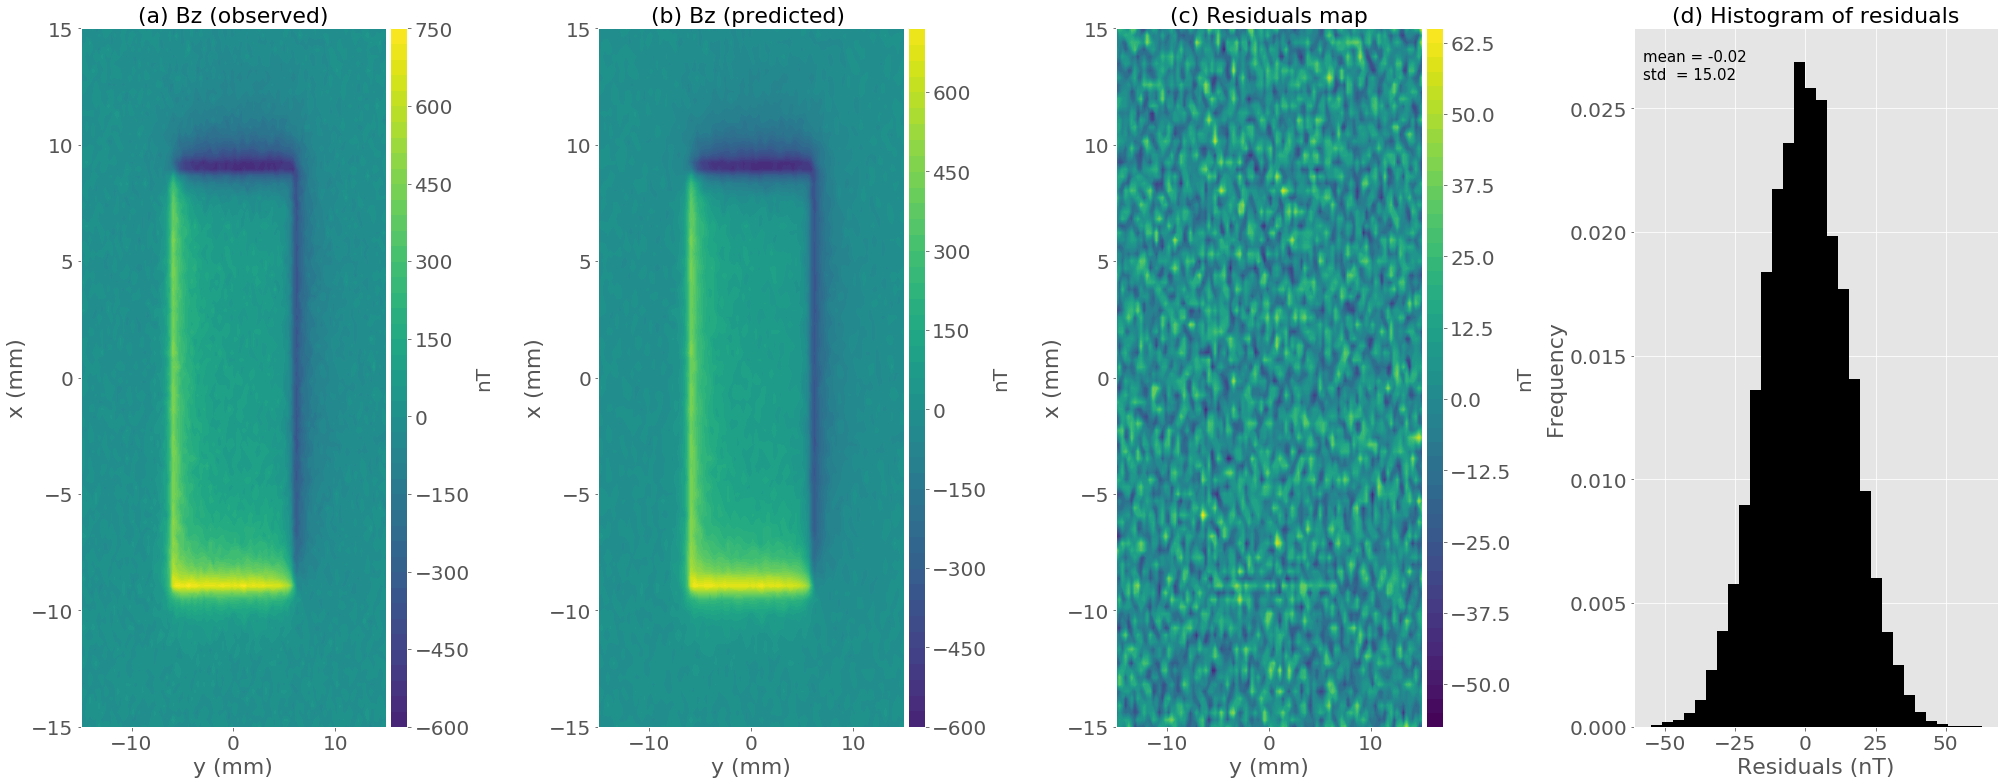

In [19]:
title_font = 22
bottom_font = 20
plt.figure(figsize=(28,11), tight_layout=True)


ranges = np.abs([data['bz_obs'].max(),
                 data['bz_obs'].min()]).max()

ax1=plt.subplot(1,4,1)

plt.title('(a) Bz (observed)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['bz_obs'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax2=plt.subplot(1,4,2)

plt.title('(b) Bz (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             bz.reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax3=plt.subplot(1,4,3)
plt.title('(c) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_z.reshape(grid['shape']),50,cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

ax4=plt.subplot(1,4,4)

plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_z), np.std(res_z)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_z,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)



########################################################################### 
file_name = 'figs/results_data_fitting_Bz'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

### Visualization of calculated components

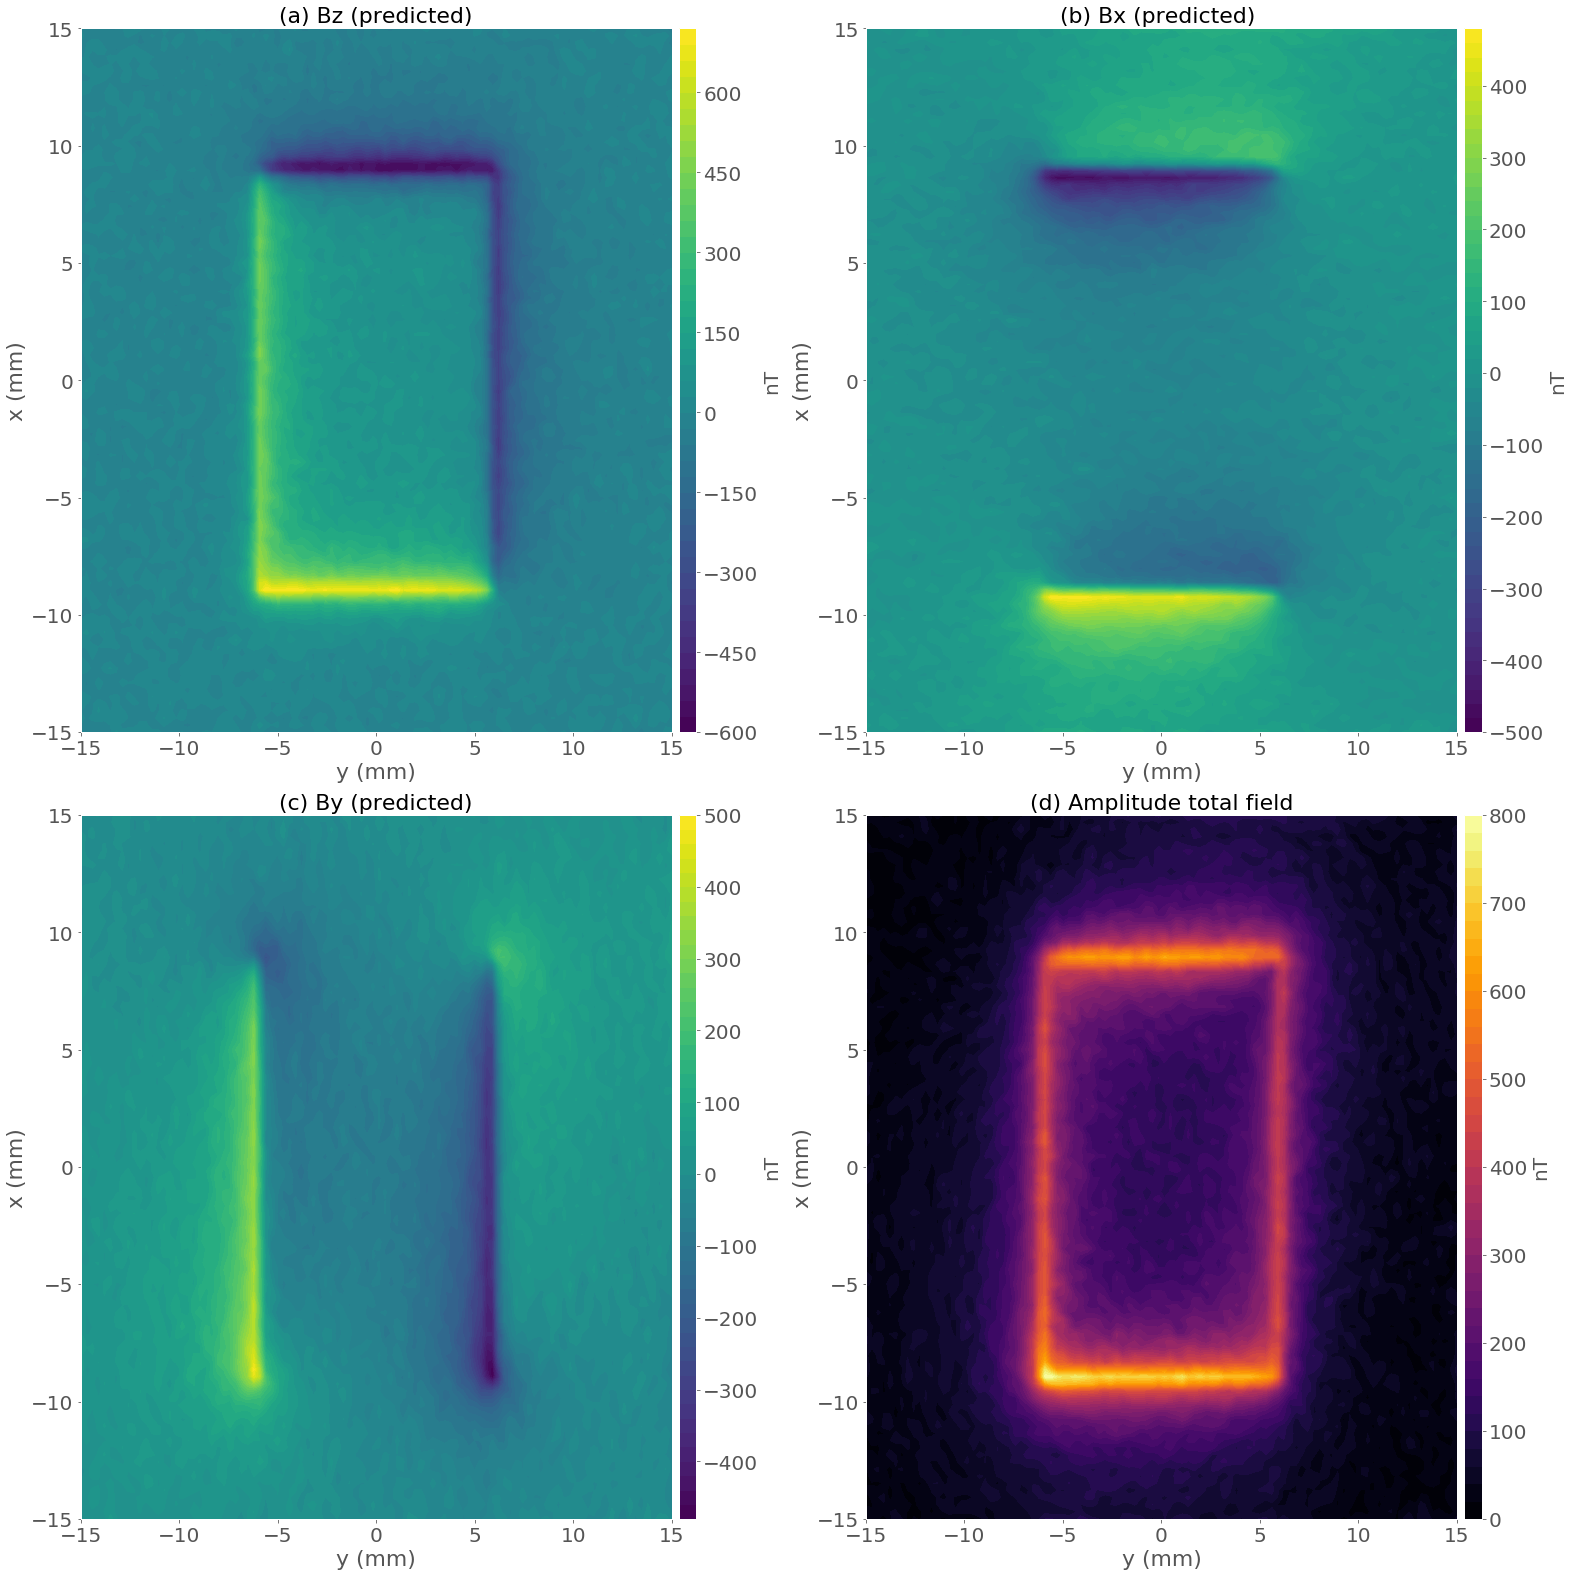

In [20]:
title_font = 22
bottom_font = 20
plt.figure(figsize=(22,22), tight_layout=True)


ax1=plt.subplot(2,2,1)

plt.title('(a) Bz (predicted)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             bz.reshape(grid['shape']),50,cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax2=plt.subplot(2,2,2)

plt.title('(b) Bx (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             bx.reshape(grid['shape']),50,cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax3=plt.subplot(2,2,3)
plt.title('(c) By (predicted)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             by.reshape(grid['shape']),50,cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax4=plt.subplot(2,2,4)

plt.title('(d) Amplitude total field', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             b_tot.reshape(grid['shape']),50,cmap='inferno')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


########################################################################### 
file_name = 'figs/field_components_eqlayer'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

## Comparison with the true and calculated

### For Bx

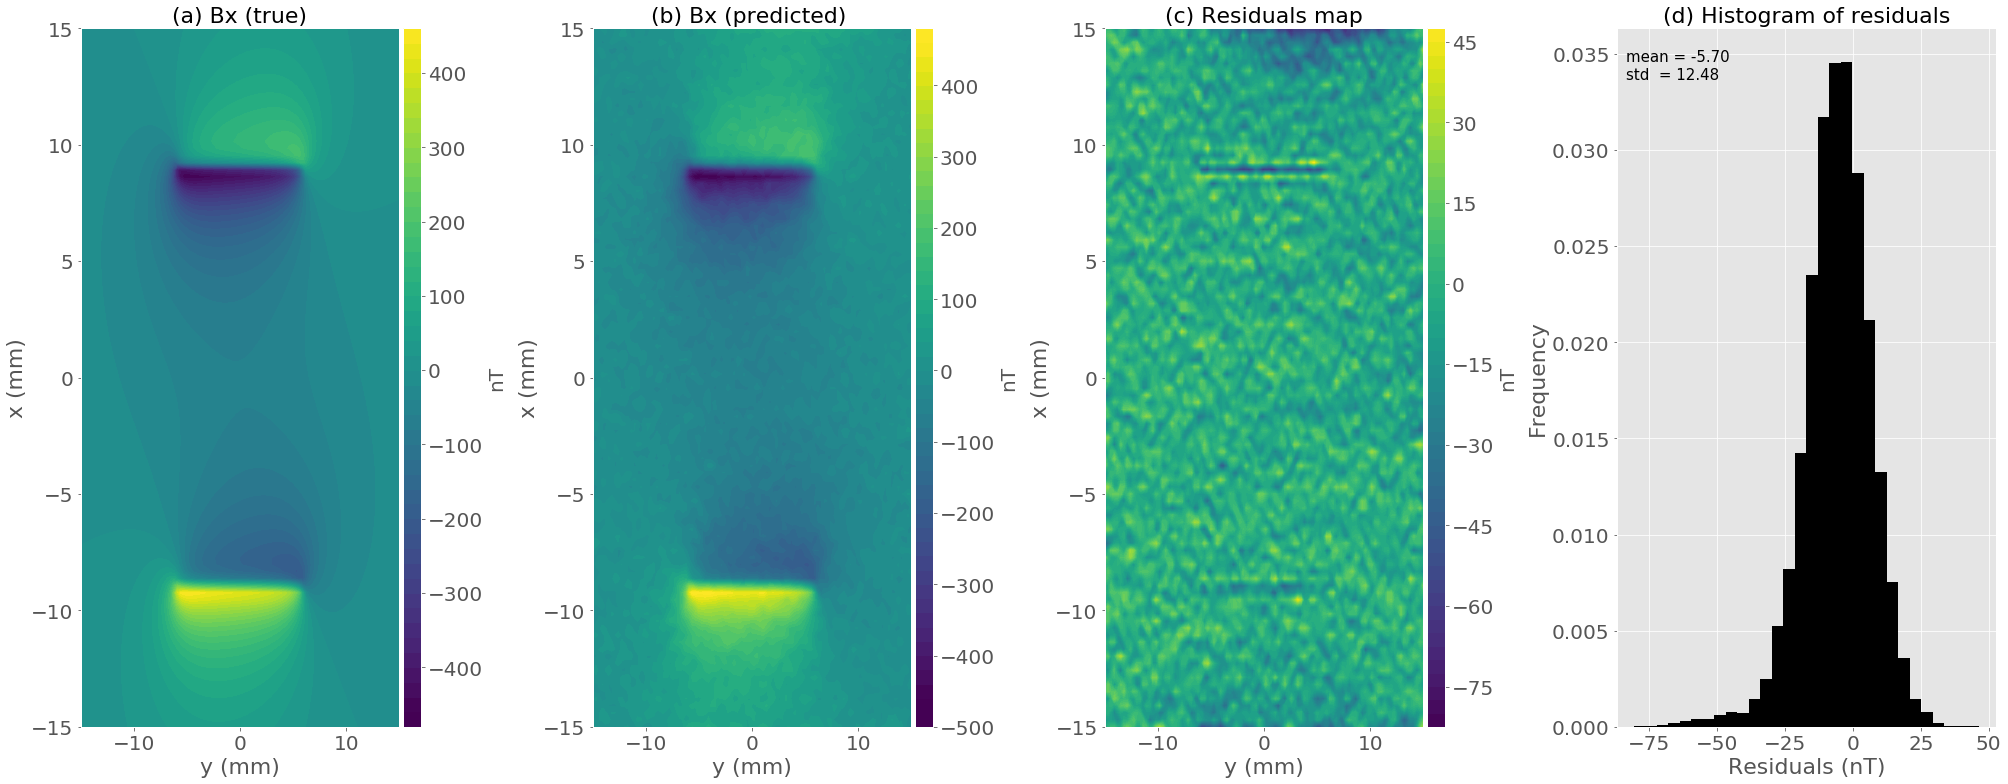

In [21]:
title_font = 22
bottom_font = 20
plt.figure(figsize=(28,11), tight_layout=True)

ranges = np.abs([data['bx_true'].max(),
                 data['bx_true'].min()]).max()

ax1=plt.subplot(1,4,1)

plt.title('(a) Bx (true)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['bx_true'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax2=plt.subplot(1,4,2)

plt.title('(b) Bx (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             bx.reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax3=plt.subplot(1,4,3)

plt.title('(c) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_x.reshape(grid['shape']),50,cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

ax4=plt.subplot(1,4,4)

plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_x), np.std(res_x)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_x,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)


########################################################################### 
file_name = 'figs/results_data_fitting_bx'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

### For By

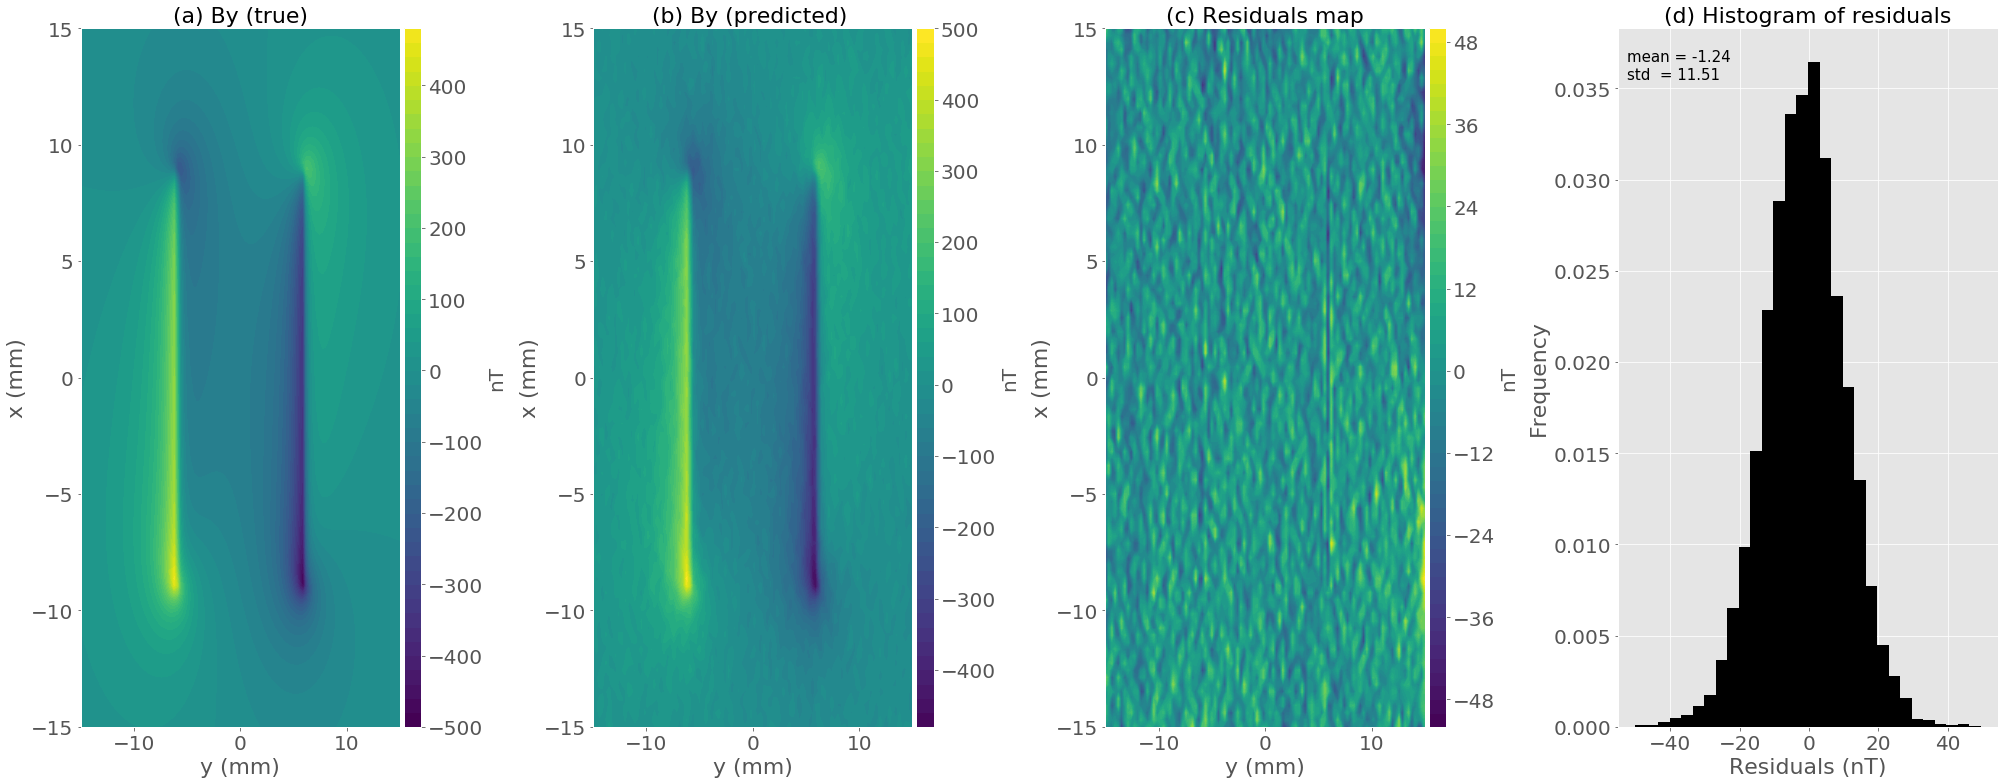

In [22]:
title_font = 22
bottom_font = 20
plt.figure(figsize=(28,11), tight_layout=True)


ranges = np.abs([data['by_true'].max(),
                 data['by_true'].min()]).max()

ax1=plt.subplot(1,4,1)

plt.title('(a) By (true)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['by_true'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax2=plt.subplot(1,4,2)

plt.title('(b) By (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             by.reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax3=plt.subplot(1,4,3)

plt.title('(c) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_y.reshape(grid['shape']),50,cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax4=plt.subplot(1,4,4)

plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_y), np.std(res_y)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_y,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)


########################################################################### 
file_name = 'figs/results_data_fitting_by'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

## For Amplitude of B

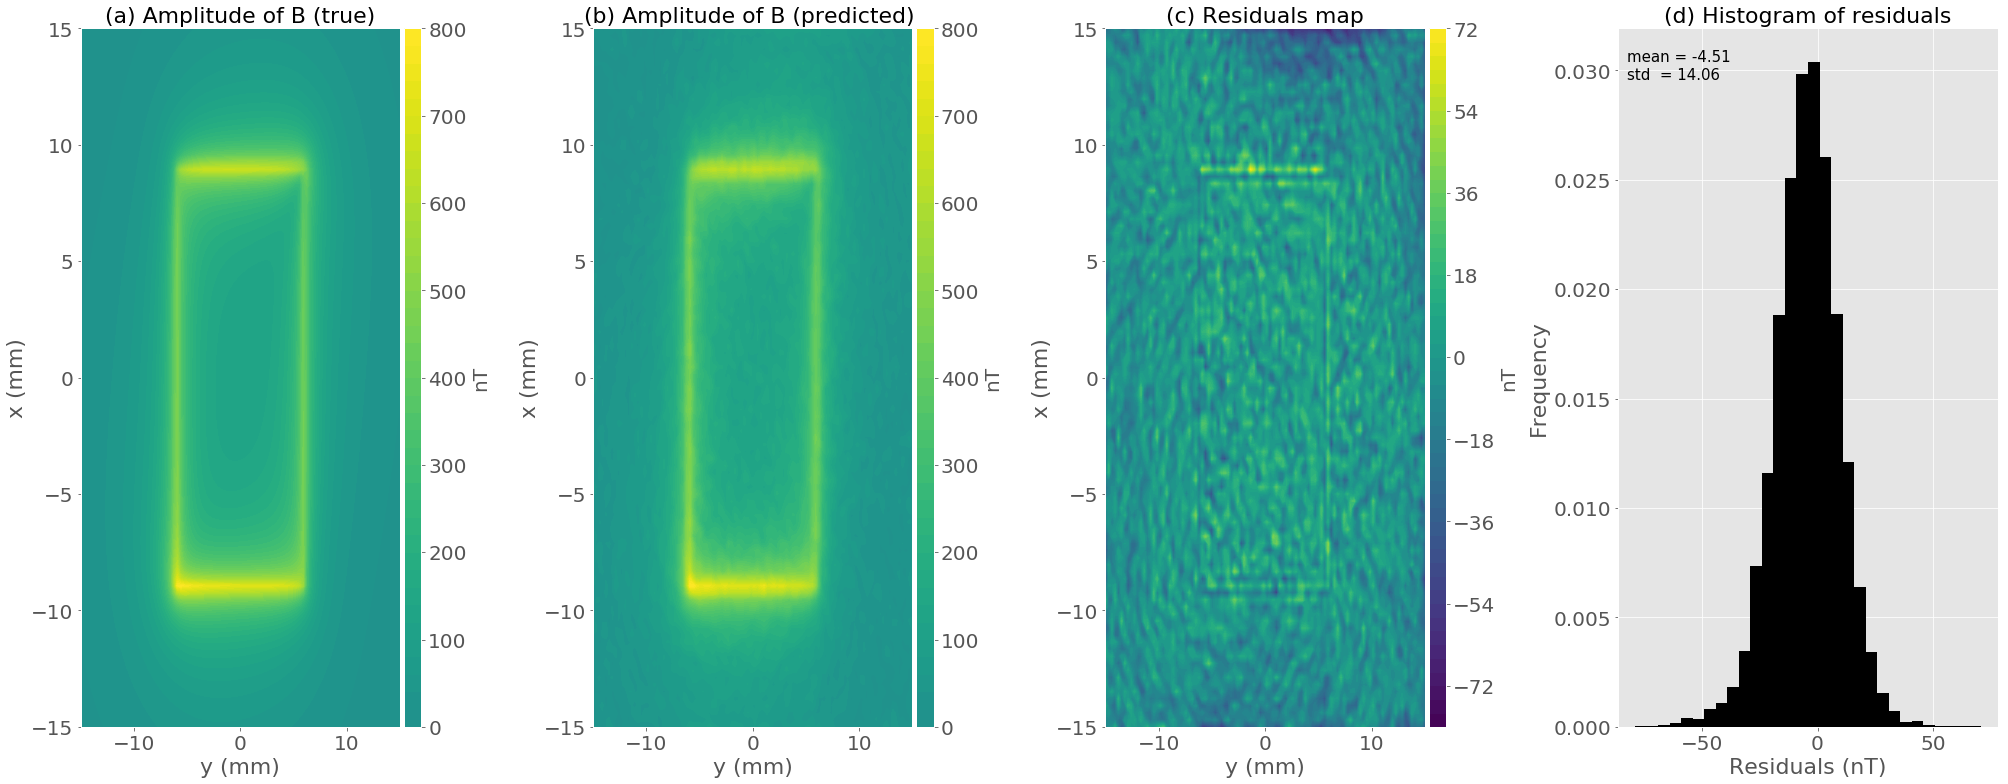

In [23]:
title_font = 22
bottom_font = 20
plt.figure(figsize=(28,11), tight_layout=True)

ranges = np.abs([data['B_true'].max(),
                 data['B_true'].min()]).max()

ax1=plt.subplot(1,4,1)
plt.title('(a) Amplitude of B (true)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['B_true'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax2=plt.subplot(1,4,2)
plt.title('(b) Amplitude of B (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             b_tot.reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax3=plt.subplot(1,4,3)
plt.title('(c) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_B.reshape(grid['shape']),50,cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax4=plt.subplot(1,4,4)
plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_B), np.std(res_B)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_B,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)

########################################################################### 
file_name = 'figs/results_data_fitting_B'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

### Compiled results

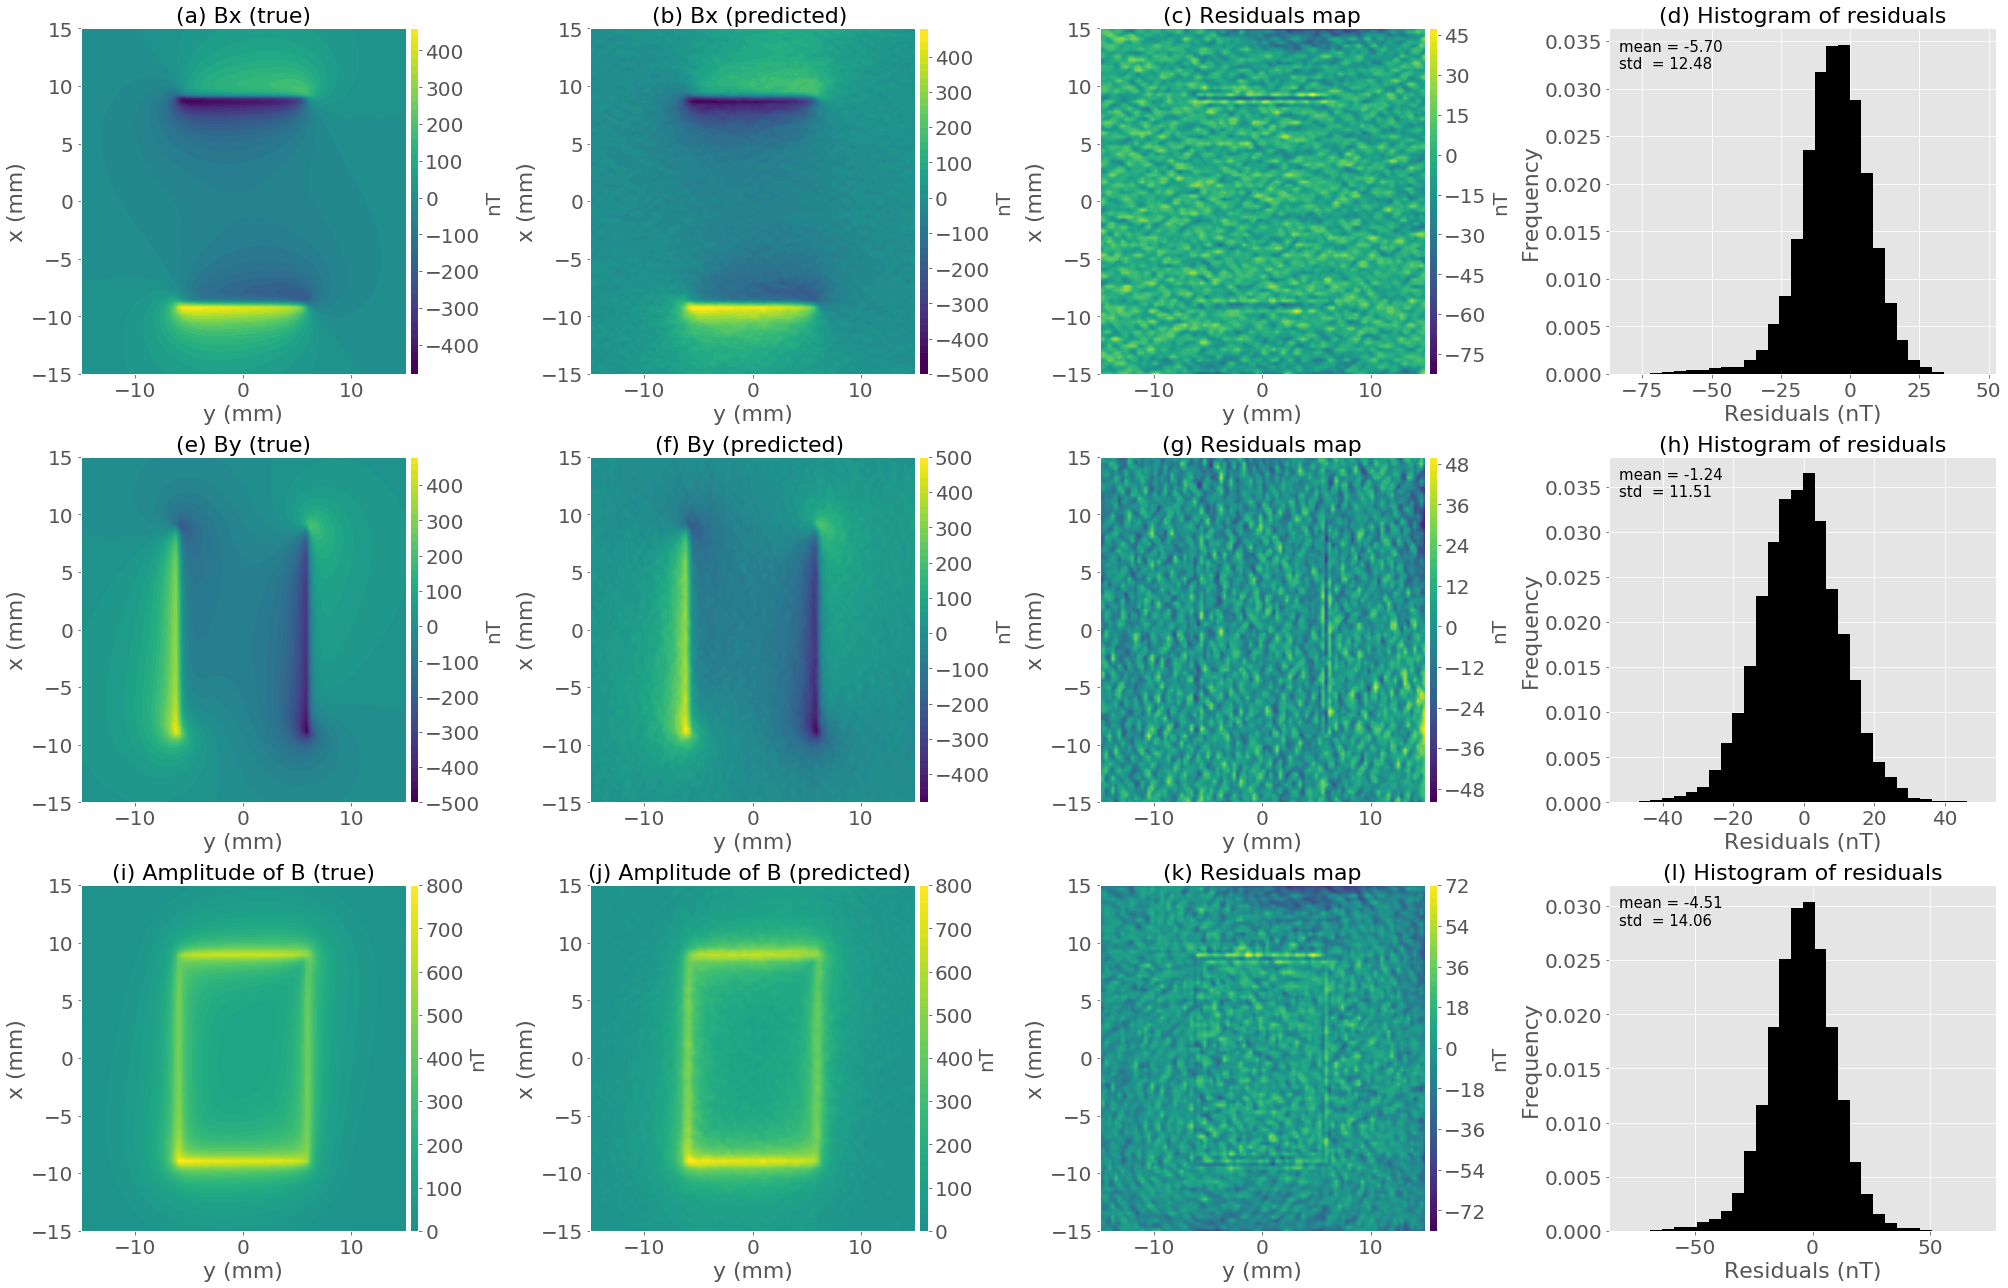

In [24]:
title_font = 22
bottom_font = 20
plt.figure(figsize=(28,18), tight_layout=True)

### bx component
rangesx = np.abs([data['bx_true'].max(),
                 data['bx_true'].min()]).max()

ax1=plt.subplot(3,4,1)

plt.title('(a) Bx (true)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['bx_true'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-rangesx,vmax=rangesx)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax2=plt.subplot(3,4,2)

plt.title('(b) Bx (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             bx.reshape(grid['shape']),
             50,cmap='viridis',vmin=-rangesx,vmax=rangesx)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax3=plt.subplot(3,4,3)

plt.title('(c) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_x.reshape(grid['shape']),50,cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

ax4=plt.subplot(3,4,4)

plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_x), np.std(res_x)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_x,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)

#### By component
rangesy = np.abs([data['by_true'].max(),
                 data['by_true'].min()]).max()
ax5=plt.subplot(3,4,5)

plt.title('(e) By (true)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['by_true'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-rangesy,vmax=rangesy)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax6=plt.subplot(3,4,6)

plt.title('(f) By (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             by.reshape(grid['shape']),
             50,cmap='viridis',vmin=-rangesy,vmax=rangesy)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax7=plt.subplot(3,4,7)

plt.title('(g) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_y.reshape(grid['shape']),50,cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax8=plt.subplot(3,4,8)

plt.title('(h) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_y), np.std(res_y)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax8.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_y,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)


### Amplitude 
rangesb = np.abs([data['B_true'].max(),
                 data['B_true'].min()]).max()
ax9=plt.subplot(3,4,9)
plt.title('(i) Amplitude of B (true)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['B_true'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-rangesb,vmax=rangesb)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax10=plt.subplot(3,4,10)
plt.title('(j) Amplitude of B (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             b_tot.reshape(grid['shape']),
             50,cmap='viridis',vmin=-rangesb,vmax=rangesb)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax11=plt.subplot(3,4,11)
plt.title('(k) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_B.reshape(grid['shape']),50,cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax12=plt.subplot(3,4,12)
plt.title('(l) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_B), np.std(res_B)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax12.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_B,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)

########################################################################### 
file_name = 'figs/comparison_true_estimated'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()